In [1]:
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fftfreq
# importing the modules
from sklearn.model_selection import train_test_split
from scipy import stats
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("notebook")
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set_palette("husl")
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pickle as pkl
import lightgbm as lgb
import shap


D:\Miniconda\envs\tf\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
D:\Miniconda\envs\tf\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_pa

In [3]:
Test_tab_file_3C="D:/PAPA Conference/Anushka/Output Dataset/Test_tab_PGA_data_3C.csv"
Train_tab_file_3C="D:/PAPA Conference/Anushka/Output Dataset/Train_tab_PGA_data_3C.csv"
Val_tab_file_3C="D:/PAPA Conference/Anushka/Output Dataset/Val_tab_PGA_data_3C.csv"

In [7]:
def select_data():
    merged_file=pd.read_csv('D:/PAPA Conference/Anushka/MOD_Total_soil_09SEP2022.csv',sep=",")
    print("Max PGA",np.max(merged_file['Max H PGA']))
    print("Max PGA",np.min(merged_file['Max H PGA']))
    merged_file=merged_file[merged_file['Max H PGA'] >=25]
    merged_file=merged_file[merged_file['Max H PGA'] <=250]
    #to get maximum values of each group in pandas
    display(merged_file.head())
    new_file=['Hypocenter Distance','Magnitude','Soil type','Max H PGA']  
#     new_file=['Hypocenter Distance','Epicenter Distance','Magnitude','Soil type','Epicenter_Lon', 'Epicenter_Lat','Station_Lat','Station_Lon','Vs30'
# ,'Focal depth','Max H PGA']
    #append magnitude at last
    new_merge = merged_file[new_file]     
    new_merge.to_csv('D:/PAPA Conference/Anushka/Input Dataset/Input_PGA_DATASET.csv')
    dataset=new_merge.values
    print(dataset.shape)
    t=dataset.shape[1]-1
    X = dataset[:,0:t]
    Y = dataset[:,t]
    seed = 7
    test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    print(X_test.shape)
    print(X_train.shape)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test=select_data()



Max PGA 2699.886
Max PGA 0.334


,Magnitude,Station Name,Epicenter Distance,Hypocenter Distance,Station_Lat,Station_Lon,Epicenter_Lat,Epicenter_Lon,PGA_UD,PGA_NS,PGA_EW,Duration time,Max H PGA,Vs30,Soil type,Focal depth
46,3.9,KNG203,43.082092,97.979930,34.7983,139.6435,35.160,139.813,1.516,16.412,32.681,76,32.681,500.0,3,88
126,3.7,AIC008,14.622523,40.716313,35.0977,137.5697,34.987,137.483,12.711,17.037,42.583,60,42.583,698.0,3,38
152,6.0,CHB019,59.190104,93.981213,35.1105,139.8351,35.582,140.138,33.200,100.633,72.226,229,100.633,142.0,5,73
154,6.0,KNG006,56.064604,92.044771,35.4544,139.5387,35.582,140.138,15.266,50.003,48.128,122,50.003,405.0,3,73
156,6.0,KNG012,87.449837,113.914327,35.3794,139.2048,35.582,140.138,10.493,27.766,15.198,108,27.766,476.0,3,73


(5002, 4)
(1501, 3)
(3501, 3)


0:	learn: 44.9935961	total: 875us	remaining: 875ms
100:	learn: 37.2248945	total: 60.7ms	remaining: 540ms
200:	learn: 36.2754789	total: 121ms	remaining: 481ms
300:	learn: 35.7621907	total: 181ms	remaining: 420ms
400:	learn: 35.2809450	total: 240ms	remaining: 359ms
500:	learn: 34.9477210	total: 300ms	remaining: 299ms
600:	learn: 34.6229484	total: 360ms	remaining: 239ms
700:	learn: 34.3207850	total: 419ms	remaining: 179ms
800:	learn: 34.0542475	total: 482ms	remaining: 120ms
900:	learn: 33.8443572	total: 542ms	remaining: 59.5ms
999:	learn: 33.6347888	total: 601ms	remaining: 0us
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 3501, number of used features: 3
[LightGBM] [Info] Start training from score 64.833265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

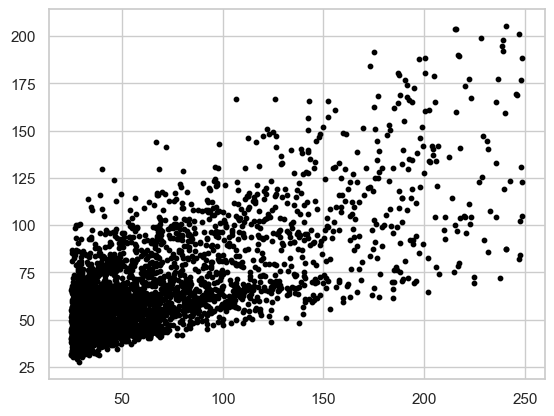

In [9]:
def Model_ML(X_train_new, y_train_new):
    XGB_model = xgb.XGBRegressor(max_depth=3,learning_rate=0.08,n_estimators=400,subsample=0.90,seed=1,
                            alpha=0.1,min_child_weight=1,random_state=1,scale_pos_weight = 1,base_score=100,
                            reg_lambda=0.2 )
    CatB_model = CatBoostRegressor(iterations=1000,  # Number of trees (boosting rounds)
                         learning_rate=0.14,  # Step size for the optimization
                         depth=3,  # Tree depth
                         verbose=100)
    
    RF1_model = RandomForestRegressor(n_estimators=1000,  # Number of trees in the forest
                             max_depth=10,  # Maximum depth of each tree
                             random_state=42)  # Set a random seed for reproducibility   
    RF2_model = RandomForestRegressor(n_estimators=500,  # Number of trees in the forest
                             max_depth=10,  # Maximum depth of each tree
                             random_state=42)  # Set a random seed for reproducibility
    LGBM_model = lgb.LGBMRegressor(n_estimators=100,  # Number of boosting rounds
                         learning_rate=0.1,  # Step size for the optimization
                         max_depth=3,  # Maximum depth of the trees
                         random_state=42)  # Set a random seed for reproducibility
    # Train the model on your training data
    XGB_model.fit(X_train_new, y_train_new)
    CatB_model.fit(X_train_new, y_train_new)
    # Train the model on your training data
    RF1_model.fit(X_train_new, y_train_new)
    RF2_model.fit(X_train_new, y_train_new)
    LGBM_model.fit(X_train_new, y_train_new)
    file_path ='Model/XGB_main_model.pkl'
#     # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle to dump the model into the file
        pkl.dump(XGB_model, file)
    file_path ='Model/CatB_main_model.pkl'
#     # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle to dump the model into the file
        pkl.dump(CatB_model, file)
    file_path ='Model/RF1_main_model.pkl'
#     # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle to dump the model into the file
        pkl.dump(RF1_model, file)
    file_path ='Model/RF2_main_model.pkl'
#     # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle to dump the model into the file
        pkl.dump(RF2_model, file)
    file_path ='Model/LGBM_main_model.pkl'
#     # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle to dump the model into the file
        pkl.dump(LGBM_model, file)
        
    return XGB_model,CatB_model,RF1_model,RF2_model,LGBM_model

XGB_model,CatB_model,RF1_model,RF2_model,LGBM_model=Model_ML(X_train,y_train)

def evaluate_error(pga_test,predictions):
  print("Size is: ",predictions.shape)

  mae = mean_absolute_error(pga_test,predictions)
  print("Mean Absolute Error:", mae)

  diff=np.abs(pga_test- predictions)
  std_dev_pga = np.std(diff)
  print("Standard deviation is",std_dev_pga)
  rmse = np.sqrt(mean_squared_error(pga_test, predictions))
  print("Root Mean Squared Error:", rmse)
  return predictions
    
def Pred_save(X_test,y_test,Test_tab_file_3C,XGB_model,CatB_model,RF1_model,RF2_model,LGBM_model):
    combined_data=X_test
    pga_test=y_test
    predictions1=XGB_model.predict(combined_data)
    predictions1=np.round(predictions1,decimals=1)
    predictions2=CatB_model.predict(combined_data)
    predictions2=np.round(predictions2,decimals=1)
    predictions3=RF1_model.predict(combined_data)
    predictions3=np.round(predictions3,decimals=1)
    predictions4=RF2_model.predict(combined_data)
    predictions4=np.round(predictions4,decimals=1)
    predictions5=LGBM_model.predict(combined_data)
    predictions5=np.round(predictions5,decimals=1)
    print("Size is: ",predictions1.shape)
    weight_predictions1 = 0.7
    weight_predictions4 = 0.3
    # Calculate the weighted average of the predictions
    predictions = (predictions1 +predictions2+ predictions5)/3
    df=pd.read_csv(Test_tab_file_3C,sep=',')
    col='CNNAttention_Pred'
    df[col]=predictions
    col2=col+'diff'
    print(pga_test.shape)
    pred=predictions.flatten()
    print(pred.shape)
    diffr=pga_test-pred
    df[col2]=diffr
    for i in range(0,len(pred)):
        if pred[i]<0:
            print("Pred:",pred[i])
    evaluate_error(pga_test,predictions)
    plt.scatter(pga_test,predictions,s=10,color='black')
    # plt.xlim(2, 9)
    # plt.ylim(2, 9)    
    df.to_csv(Test_tab_file_3C,index=False)

Pred_save(X_train,y_train,Train_tab_file_3C,XGB_model,CatB_model,RF1_model,RF2_model,LGBM_model)


In [21]:

df_2=pd.read_csv(Test_tab_file_3C,sep=",")
p1=df_2[(3<= df_2['Magnitude'])  & (df_2['Magnitude']<= 5.5)]
p2=p1['Magnitude']
moment_p2=0.58*p2+2.25
df_2.loc[(3<= df_2['Magnitude'])  & (df_2['Magnitude']<= 5.5),'Moment Magnitude']=moment_p2


#magnitude between
p3=df_2[(5.6<= df_2['Magnitude'])  & (df_2['Moment Magnitude']<= 8.2)]
p4=p3['Magnitude']
moment_p4=0.97*p4+0.04
df_2.loc[(5.6<= df_2['Magnitude'])  & (df_2['Magnitude']<= 8.2),'Moment Magnitude']=moment_p4
print(df_2.shape)
print(df_2.shape)

(1172, 22)
(1172, 22)


(1172, 22)
(1172, 22)


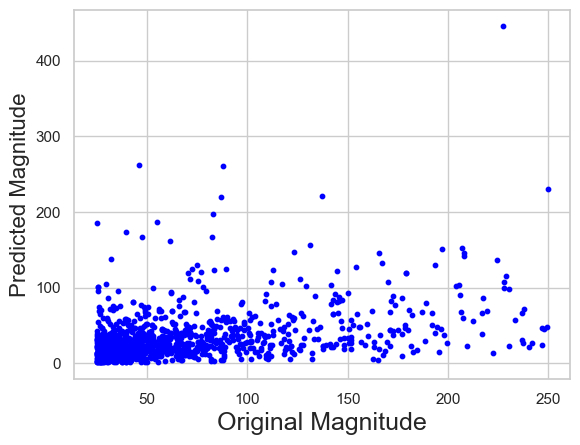

In [22]:
df_2.loc[(df_2['Vs30'] > 600) ,'Taka Soil val'] = 0.751
df_2.loc[(600>= df_2['Vs30'])  & (df_2['Vs30']> 300), 'Taka Soil val'] = 0.901
df_2.loc[(300>= df_2['Vs30']) & ( df_2['Vs30']> 200), 'Taka Soil val'] = 1.003
df_2.loc[(200>= df_2['Vs30']), 'Taka Soil val'] = 0.995
print(df_2.shape)
d=df_2['Epicenter Distance']
D=df_2['Focal depth']
M=df_2['Moment Magnitude']
s=df_2['Taka Soil val']

df_2['Taka Pred']=np.exp(0.446*M-0.0035*d-np.log(d+0.012*10**(0.446*M))+0.00665*(D-20)+s)*100
df_2 = df_2.dropna()
plt.scatter(df_2['Max H PGA'].to_numpy(), df_2['Taka Pred'].to_numpy(),color='blue',s=10)
plt.xlabel('Original Magnitude', fontsize=18)
plt.ylabel('Predicted Magnitude', fontsize=16)
print(df_2.shape)
df_2.to_csv(Test_tab_file_3C)

In [23]:
def evaluate_error(pga_test,predictions):
  print("Size is: ",predictions.shape)

  mae = mean_absolute_error(pga_test,predictions)
  print("Mean Absolute Error:", mae)

  diff=np.abs(pga_test- predictions)
  std_dev_pga = np.std(diff)
  print("Standard deviation is",std_dev_pga)
  rmse = np.sqrt(mean_squared_error(pga_test, predictions))
  print("Root Mean Squared Error:", rmse)
  return predictions

df=pd.read_csv(Test_tab_file_3C,sep=',')
display(df.head())
evaluate_error(df['Max H PGA'],df['Taka Pred'])
evaluate_error(df['Max H PGA'],df['CNNAttention_Pred'])
evaluate_error(df['Max H PGA'],df['Abraham Pred'])
evaluate_error(df['Max H PGA'],df['Shous Pred'])

,Unnamed: 0.1,Unnamed: 0,Hypocenter Distance,Epicenter Distance,Magnitude,Soil type,Epicenter_Lon,Epicenter_Lat,Station_Lat,Station_Lon,...,CNNAttention_Pred,CNNAttention_Preddiff,Moment Magnitude,Taka Soil val,Taka Pred,Surface Magnitude,Abraham Pred,Shous Soil val,Shous Pred,Log Shous Pred
0,0,0,168.920711,149.833930,6.2,4,131.890,33.692,35.0112,132.2227,...,50.800000,-3.691000,6.054,0.901,20.463558,5.9,16.275215,0.3654,18.218201,2.902421
1,1,2,117.458224,100.977396,5.6,2,141.700,37.600,38.3288,141.0128,...,40.875000,-14.475000,5.472,0.751,21.372833,5.0,17.655135,-0.2571,4.308855,1.460672
2,2,4,28.030373,26.864509,6.2,4,130.298,31.953,31.7123,130.2735,...,155.299999,50.319001,6.054,1.003,103.706657,5.9,106.938887,0.3654,221.177907,5.398967
3,3,5,68.358955,68.095130,7.0,4,140.672,36.945,36.8061,139.9264,...,122.075000,30.527000,6.830,1.003,50.553541,6.8,64.472030,0.3654,171.358875,5.143760
4,4,7,507.016300,503.914208,7.1,4,144.568,37.195,36.3181,139.0176,...,34.900000,-9.536000,6.927,1.003,2.514482,6.9,4.535798,0.3654,2.897637,1.063896


Size is:  (1172,)
Mean Absolute Error: 41.32493809633883
Standard deviation is 40.07892532554138
Root Mean Squared Error: 57.567966473695755
Size is:  (1172,)
Mean Absolute Error: 28.41917236550341
Standard deviation is 28.299903957950335
Root Mean Squared Error: 40.106532160851394
Size is:  (1172,)
Mean Absolute Error: 37.84340924951536
Standard deviation is 38.86579335319351
Root Mean Squared Error: 54.246414781065916
Size is:  (1172,)
Mean Absolute Error: 36.350387973081055
Standard deviation is 37.954175787416816
Root Mean Squared Error: 52.55349812805663


0        18.218201
1         4.308855
2       221.177907
3       171.358875
4         2.897637
           ...    
1167     31.915661
1168     29.030082
1169     19.669290
1170     31.639432
1171    112.322163
Name: Shous Pred, Length: 1172, dtype: float64

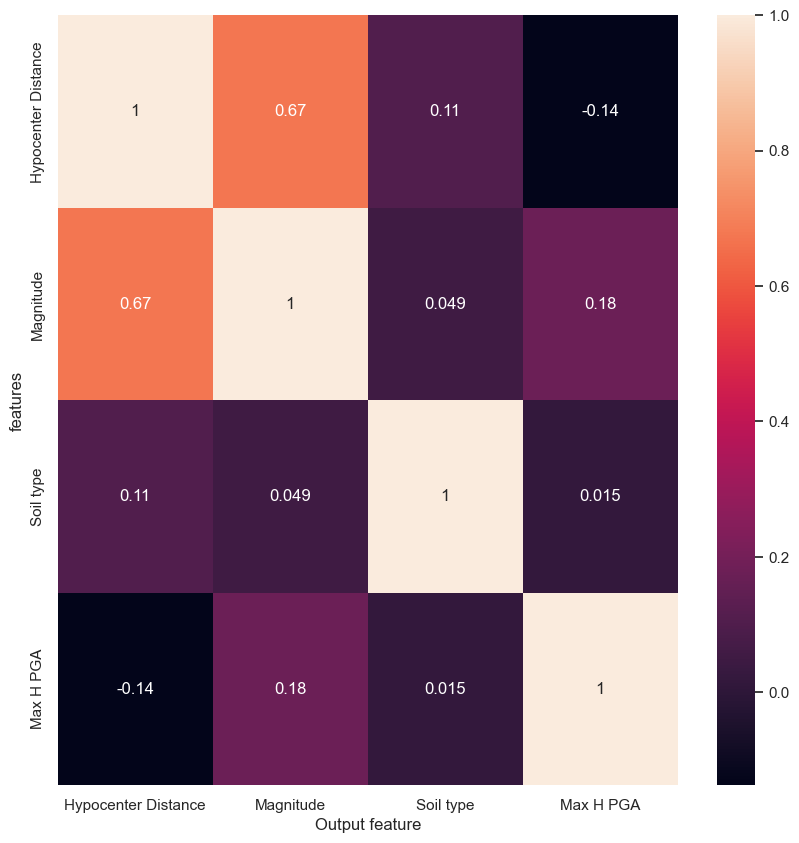

In [11]:
df=pd.read_csv(Train_tab_file_3C,sep=',')
new_file=['Hypocenter Distance','Magnitude','Soil type','Max H PGA']
anj=df[new_file]
corr = anj.corr()
# Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(10, 10))
x = corr[['Magnitude']]
sns.heatmap(corr, annot=True)

# sns.heatmap(x, annot=True)
plt.xlabel('Output feature')
plt.ylabel('features')
plt.savefig('heatmap_plot.png', dpi=300)

[  2   2   1   8   7   9  14  13  15  21  10   5  20   6  40  88  19  24
  34  37  37  61  47  68 103  80  24  63 102  45  55 116 225 131 196 103
 112   2  55 235 237 138 405 152  76  73  58 127]
[3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5
 6.6 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.7 8.  9. ]


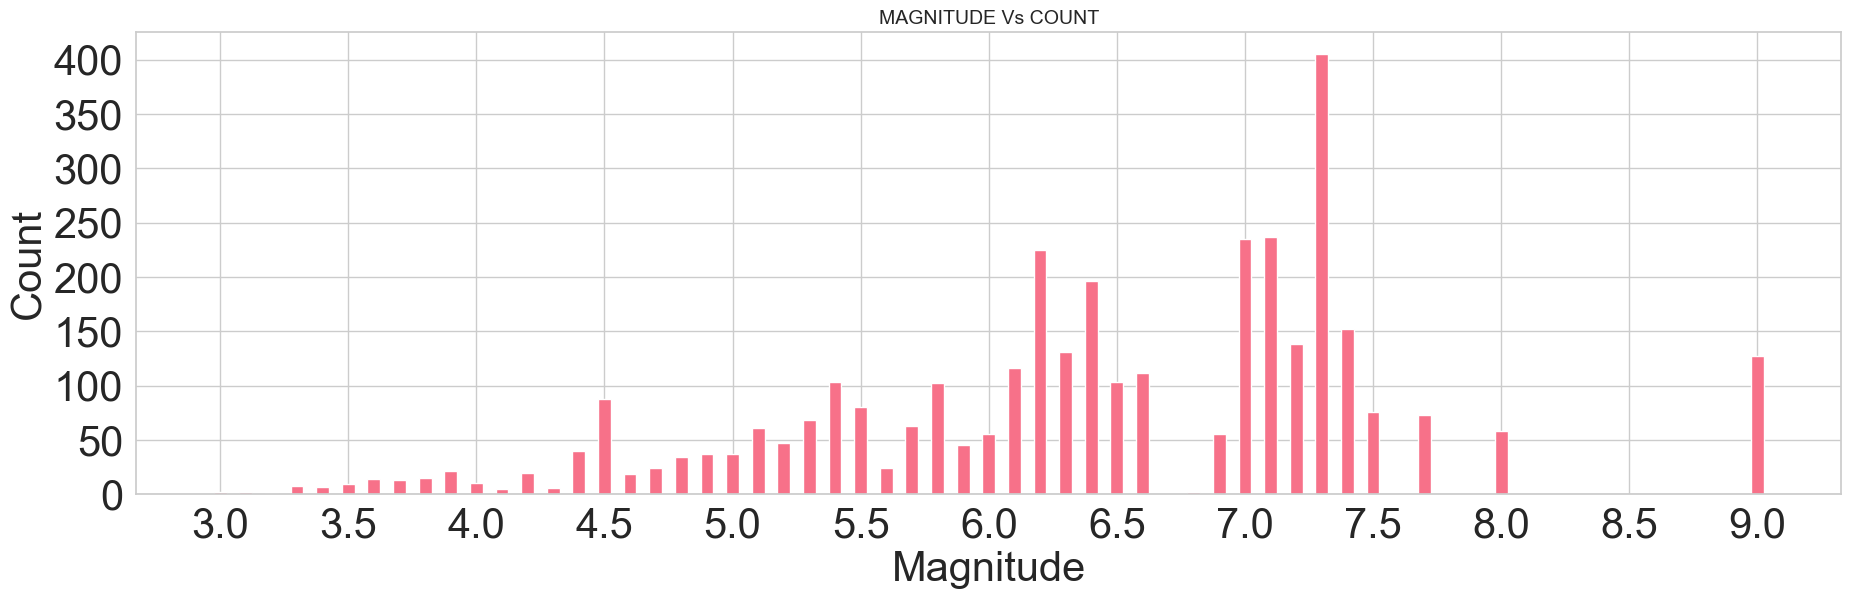

In [19]:
series=df.groupby(['Magnitude']).size().reset_index(name='counts')
count=pd.DataFrame(series['counts']).to_numpy()
count=count.flatten()
mag=pd.DataFrame(series['Magnitude']).to_numpy()
mag=mag.flatten()
print(count)
print(mag)
#making a representating bar graph

plt.figure(figsize=[22, 6])
plt.bar(mag,count,width=0.05)
plt.xticks(np.arange(3, max(mag)+0.2, .5), fontsize=30)
plt.yticks(np.arange(0, max(count)+10, 50), fontsize=30)
plt.title('MAGNITUDE Vs COUNT', fontsize=14)
plt.xlabel('Magnitude', fontsize=30)
plt.ylabel('Count', fontsize=30)

plt.grid(True)
plt.savefig('mag_count.png', dpi=400)

[16:04:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


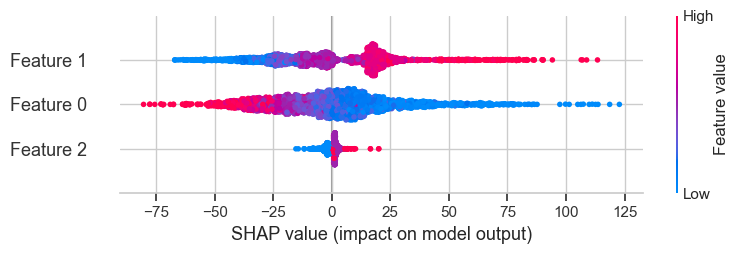

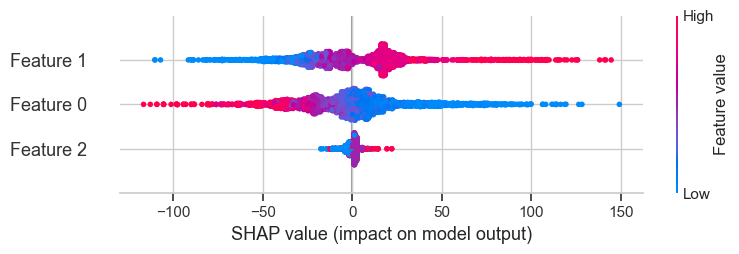

In [20]:
import shap
import pickle
import time
from sklearn.tree import export_graphviz
# plot_tree(model,num_trees=26, rankdir='TB')
# fig = plt.gcf()
# fig.set_size_inches(350, 200)
# plt.show()
file_path ='Model/XGB_main_model.pkl'
with open(file_path, 'rb') as file:
    model = pickle.load(file)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
fig, ax=plt.subplots(figsize=(40,20))
shap.summary_plot(shap_values, X_train)



file_path ='Model/CatB_main_model.pkl'
with open(file_path, 'rb') as file:
    model = pickle.load(file)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
fig, ax=plt.subplots(figsize=(40,20))
shap.summary_plot(shap_values, X_train)
time.sleep(1)



[16:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



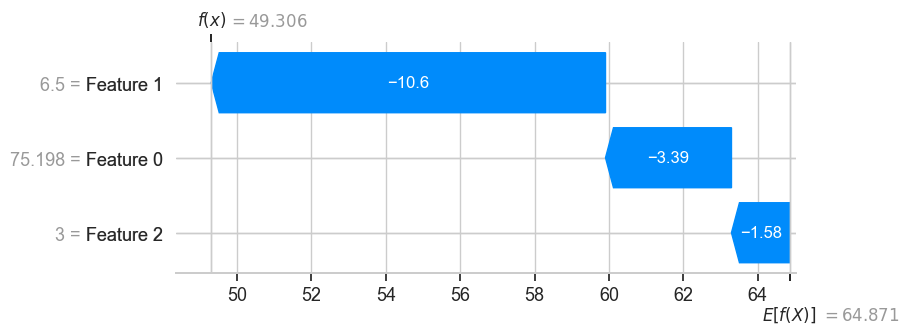

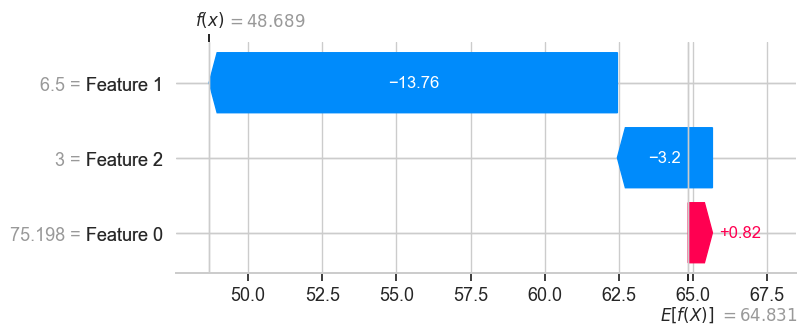

In [16]:
file_path ='Model/XGB_main_model.pkl'
with open(file_path, 'rb') as file:
    model = pickle.load(file)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

file_path ='Model/CatB_main_model.pkl'
with open(file_path, 'rb') as file:
    model = pickle.load(file)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

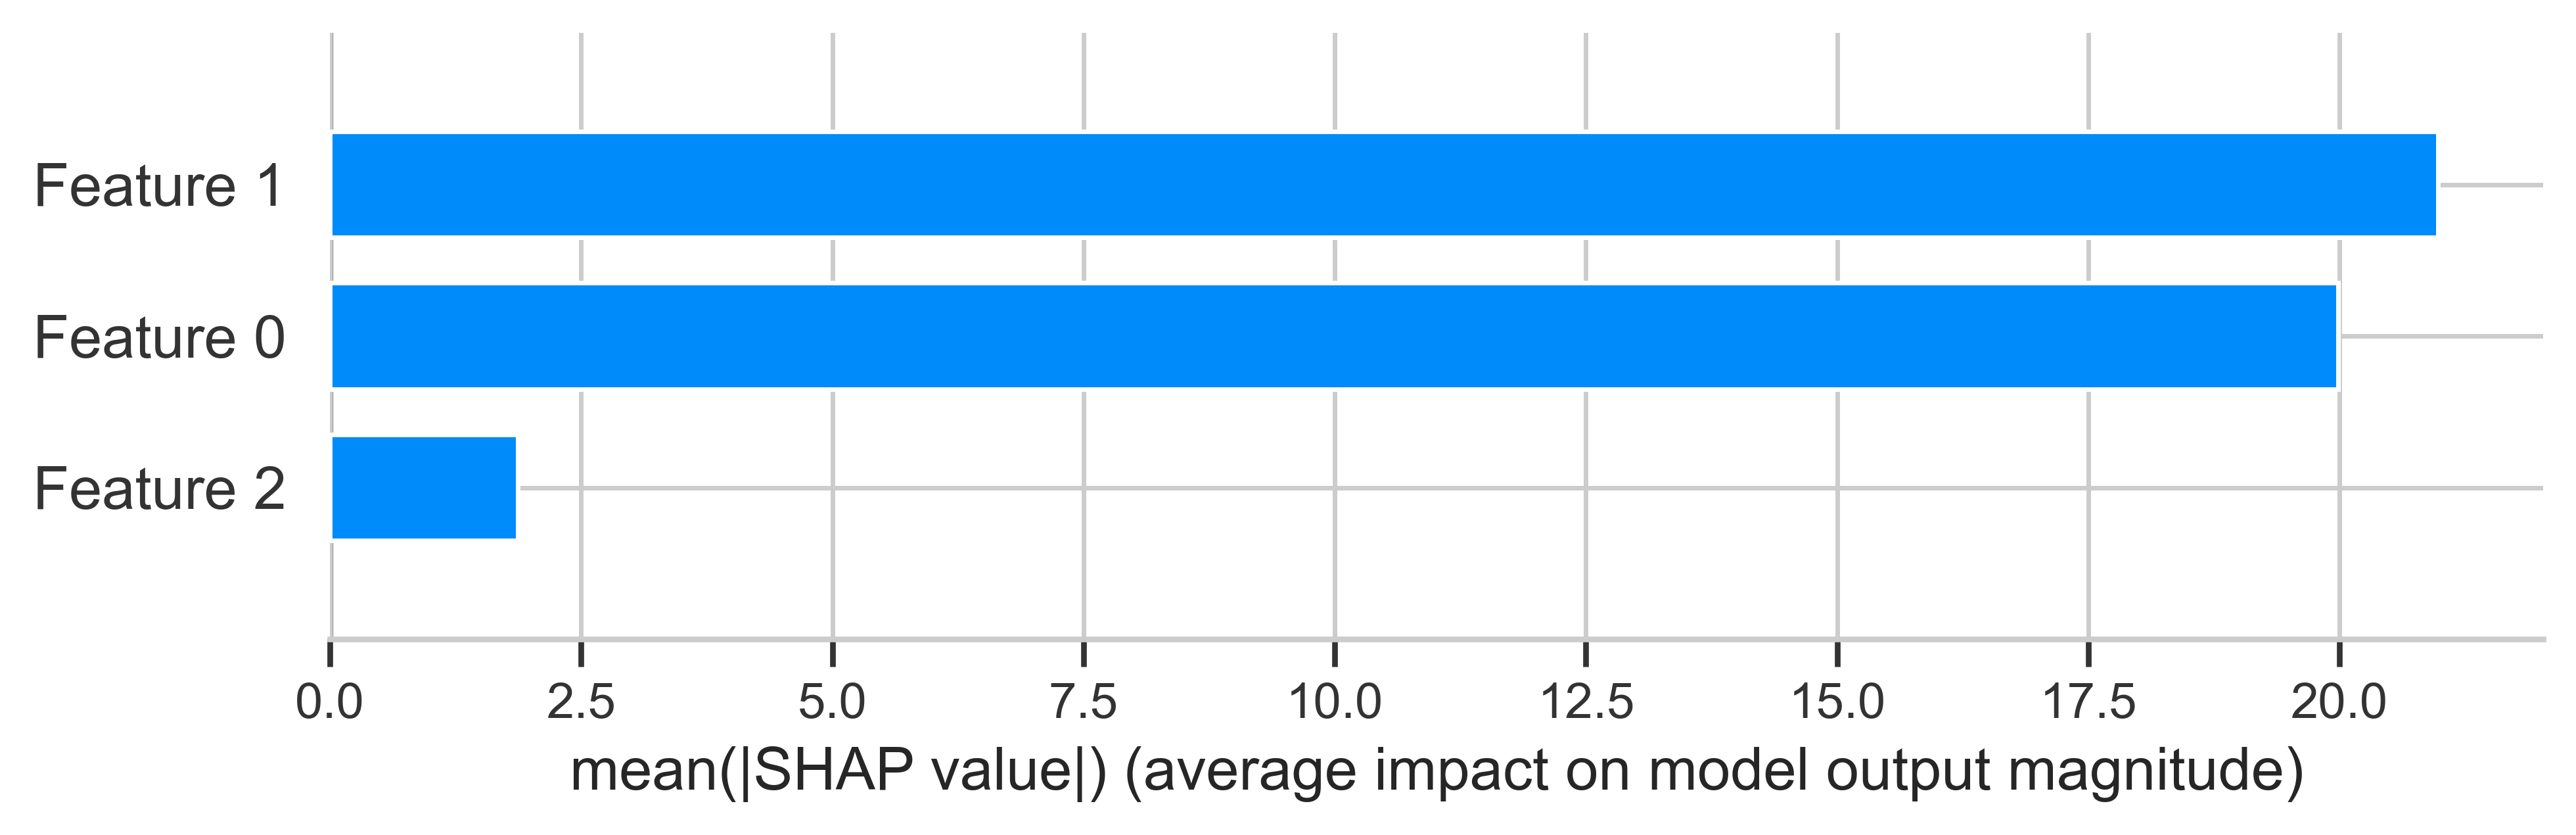

In [10]:
fig, ax=plt.subplots(figsize=(10,10), dpi=500)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

,Unnamed: 0.1,Unnamed: 0,Hypocenter Distance,Epicenter Distance,Magnitude,Soil type,Epicenter_Lon,Epicenter_Lat,Station_Lat,Station_Lon,...,Surface Magnitude,Abraham Pred,Shous Soil val,Shous Pred,Log Shous Pred,Actual exp,Pred exp,Error Pred,Error Shous,Error Taka
0,0,0,168.920711,149.833930,6.2,4,131.890,33.692,35.0112,132.2227,...,5.9,16.275215,0.3654,18.218201,2.902421,2.878583e+20,1.153877e+22,1.125091e+22,-2.878583e+20,-2.878583e+20
1,1,2,117.458224,100.977396,5.6,2,141.700,37.600,38.3288,141.0128,...,5.0,17.655135,-0.2571,4.308855,1.460672,2.919943e+11,5.646597e+17,5.646594e+17,-2.919943e+11,-2.919943e+11
2,2,4,28.030373,26.864509,6.2,4,130.298,31.953,31.7123,130.2735,...,5.9,106.938887,0.3654,221.177907,5.398967,1.991577e+89,2.792111e+67,-1.991577e+89,-1.991577e+89,-1.991577e+89
3,3,5,68.358955,68.095130,7.0,4,140.672,36.945,36.8061,139.9264,...,6.8,64.472030,0.3654,171.358875,5.143760,1.880211e+66,1.038721e+53,-1.880211e+66,-1.880211e+66,-1.880211e+66
4,4,7,507.016300,503.914208,7.1,4,144.568,37.195,36.3181,139.0176,...,6.9,4.535798,0.3654,2.897637,1.063896,1.036204e+11,1.435084e+15,1.434980e+15,-1.036204e+11,-1.036204e+11


0       2.878583e+20
1       2.919943e+11
2       1.991577e+89
3       1.880211e+66
4       1.036204e+11
            ...     
1167    1.868803e+20
1168    9.070353e+41
1169    4.357850e+12
1170    1.723857e+11
1171    1.834178e+40
Name: Actual exp, Length: 1172, dtype: float64
0        18.218201
1         4.308855
2       221.177907
3       171.358875
4         2.897637
           ...    
1167     31.915661
1168     29.030082
1169     19.669290
1170     31.639432
1171    112.322163
Name: Shous Pred, Length: 1172, dtype: float64
1172


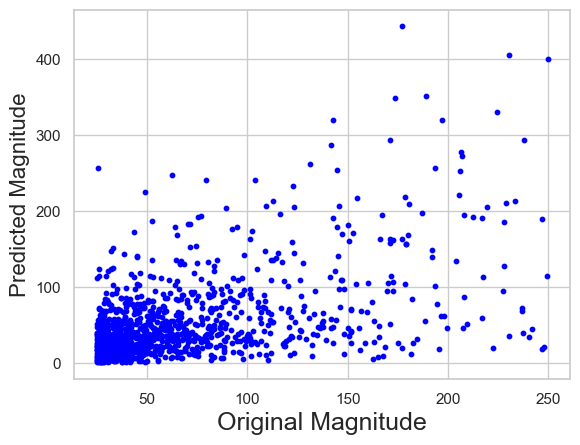

In [24]:
df_2=pd.read_csv('D:/PAPA Conference/Anushka/Output Dataset/Test_tab_PGA_data_3C.csv',sep=",")

df_2.loc[(1500>= df_2['Vs30'])  & (df_2['Vs30']> 760),'Shous Soil val'] = -0.2571
df_2.loc[(760>= df_2['Vs30'])  & (df_2['Vs30']> 360), 'Shous Soil val'] = 0.1464
df_2.loc[(360>= df_2['Vs30']) & ( df_2['Vs30']> 180), 'Shous Soil val'] = 0.3654
df_2.loc[(180> df_2['Vs30']), 'Shous Soil val'] = 0.3428

d=df_2['Hypocenter Distance']
D=df_2['Focal depth']
M=df_2['Moment Magnitude']
s=df_2['Shous Soil val']

# df_2['Taka Pred']=np.exp(0.446*M-0.0035*d-np.log(d+0.012*10**(0.446*M))+0.00665*(D-20)+s)*100


df_2['Shous Pred']=10**(0.4683*M-0.002159*d-np.log10(d)+0.6524+s)


plt.scatter(df_2['Max H PGA'].to_numpy(), df_2['Shous Pred'].to_numpy(),color='blue',s=10)
plt.xlabel('Original Magnitude', fontsize=18)
plt.ylabel('Predicted Magnitude', fontsize=16)
df_2['Log Shous Pred']=np.log(df_2['Shous Pred']).to_numpy()
df_2['Actual exp']=np.exp(df_2['Max H PGA']).to_numpy()
df_2['Pred exp']=np.exp(df_2['CNNAttention_Pred']).to_numpy()
df_2['Error Pred']=df_2['Pred exp']-df_2['Actual exp']
df_2['Error Shous']=df_2['Shous Pred']-df_2['Actual exp']
df_2['Error Taka']=df_2['Taka Pred']-df_2['Actual exp']
display(df_2.head())
print(df_2['Actual exp'])
print(df_2['Shous Pred'])
print(len(df_2))
df_2=df_2.dropna()
df_2.to_csv('D:/PAPA Conference/Anushka/Output Dataset/Test_tab_PGA_data_3C.csv',index=False)

In [25]:
def select_mag(file_loc,flag=1):
    df=pd.read_csv(file_loc,sep=',')
    if flag==0:
        p1=df[(3<= df['Magnitude'])  & (df['Magnitude']<= 5.5)]
        p2=p1['Magnitude']
        moment_p2=0.58*p2+2.25
        df.loc[(3<= df['Magnitude'])  & (df['Magnitude']<= 5.5),'Moment Magnitude']=moment_p2


        #magnitude between
        p3=df[(5.6<= df['Magnitude'])  & (df['Magnitude']<= 8.2)]
        p4=p3['Magnitude']
        moment_p4=0.97*p4+0.04
        df.loc[(5.6<= df['Magnitude'])  & (df['Magnitude']<= 8.2),'Moment Magnitude']=moment_p4
    
    #moment magnitude [M] of 5.0-9.1
    df=df[df['Moment Magnitude']>=5.0]
    df=df[df['Moment Magnitude']<=9.1]
    mo_mag=df['Moment Magnitude'].values
    surf_mag=[]
    #surface magnitude  Earthquake magnitudes range from 5.0 to 8.1
    for i in range(0,len(mo_mag)):
         
        surface1=mo_mag[i]/0.65-3.38   
        surface1=np.round(surface1,decimals=1)
        surface2=mo_mag[i]+0.02

        surface2=np.round(surface2,decimals=1)
        if surface1>=3.0 and surface1<=6.1:
            surf_mag.append(surface1)
        elif surface2>=6.2 and surface2<=8.0:
            surf_mag.append(surface2)


    df['Surface Magnitude']=surf_mag
    df=df[df['Surface Magnitude']>=5.0]
    df=df[df['Surface Magnitude']<=8.1]
    df['Abraham Pred']=(10**(-0.62+0.177*df['Surface Magnitude']-0.982*np.log10(df['Hypocenter Distance']+np.exp(0.284*df['Surface Magnitude']))+0.132-0.0008*df['Hypocenter Distance']))*980

    df.to_csv(file_loc,index=False)
        
    
file_loc='D:/PAPA Conference/Anushka/Output Dataset/Test_tab_PGA_data_3C.csv'
select_mag(file_loc)

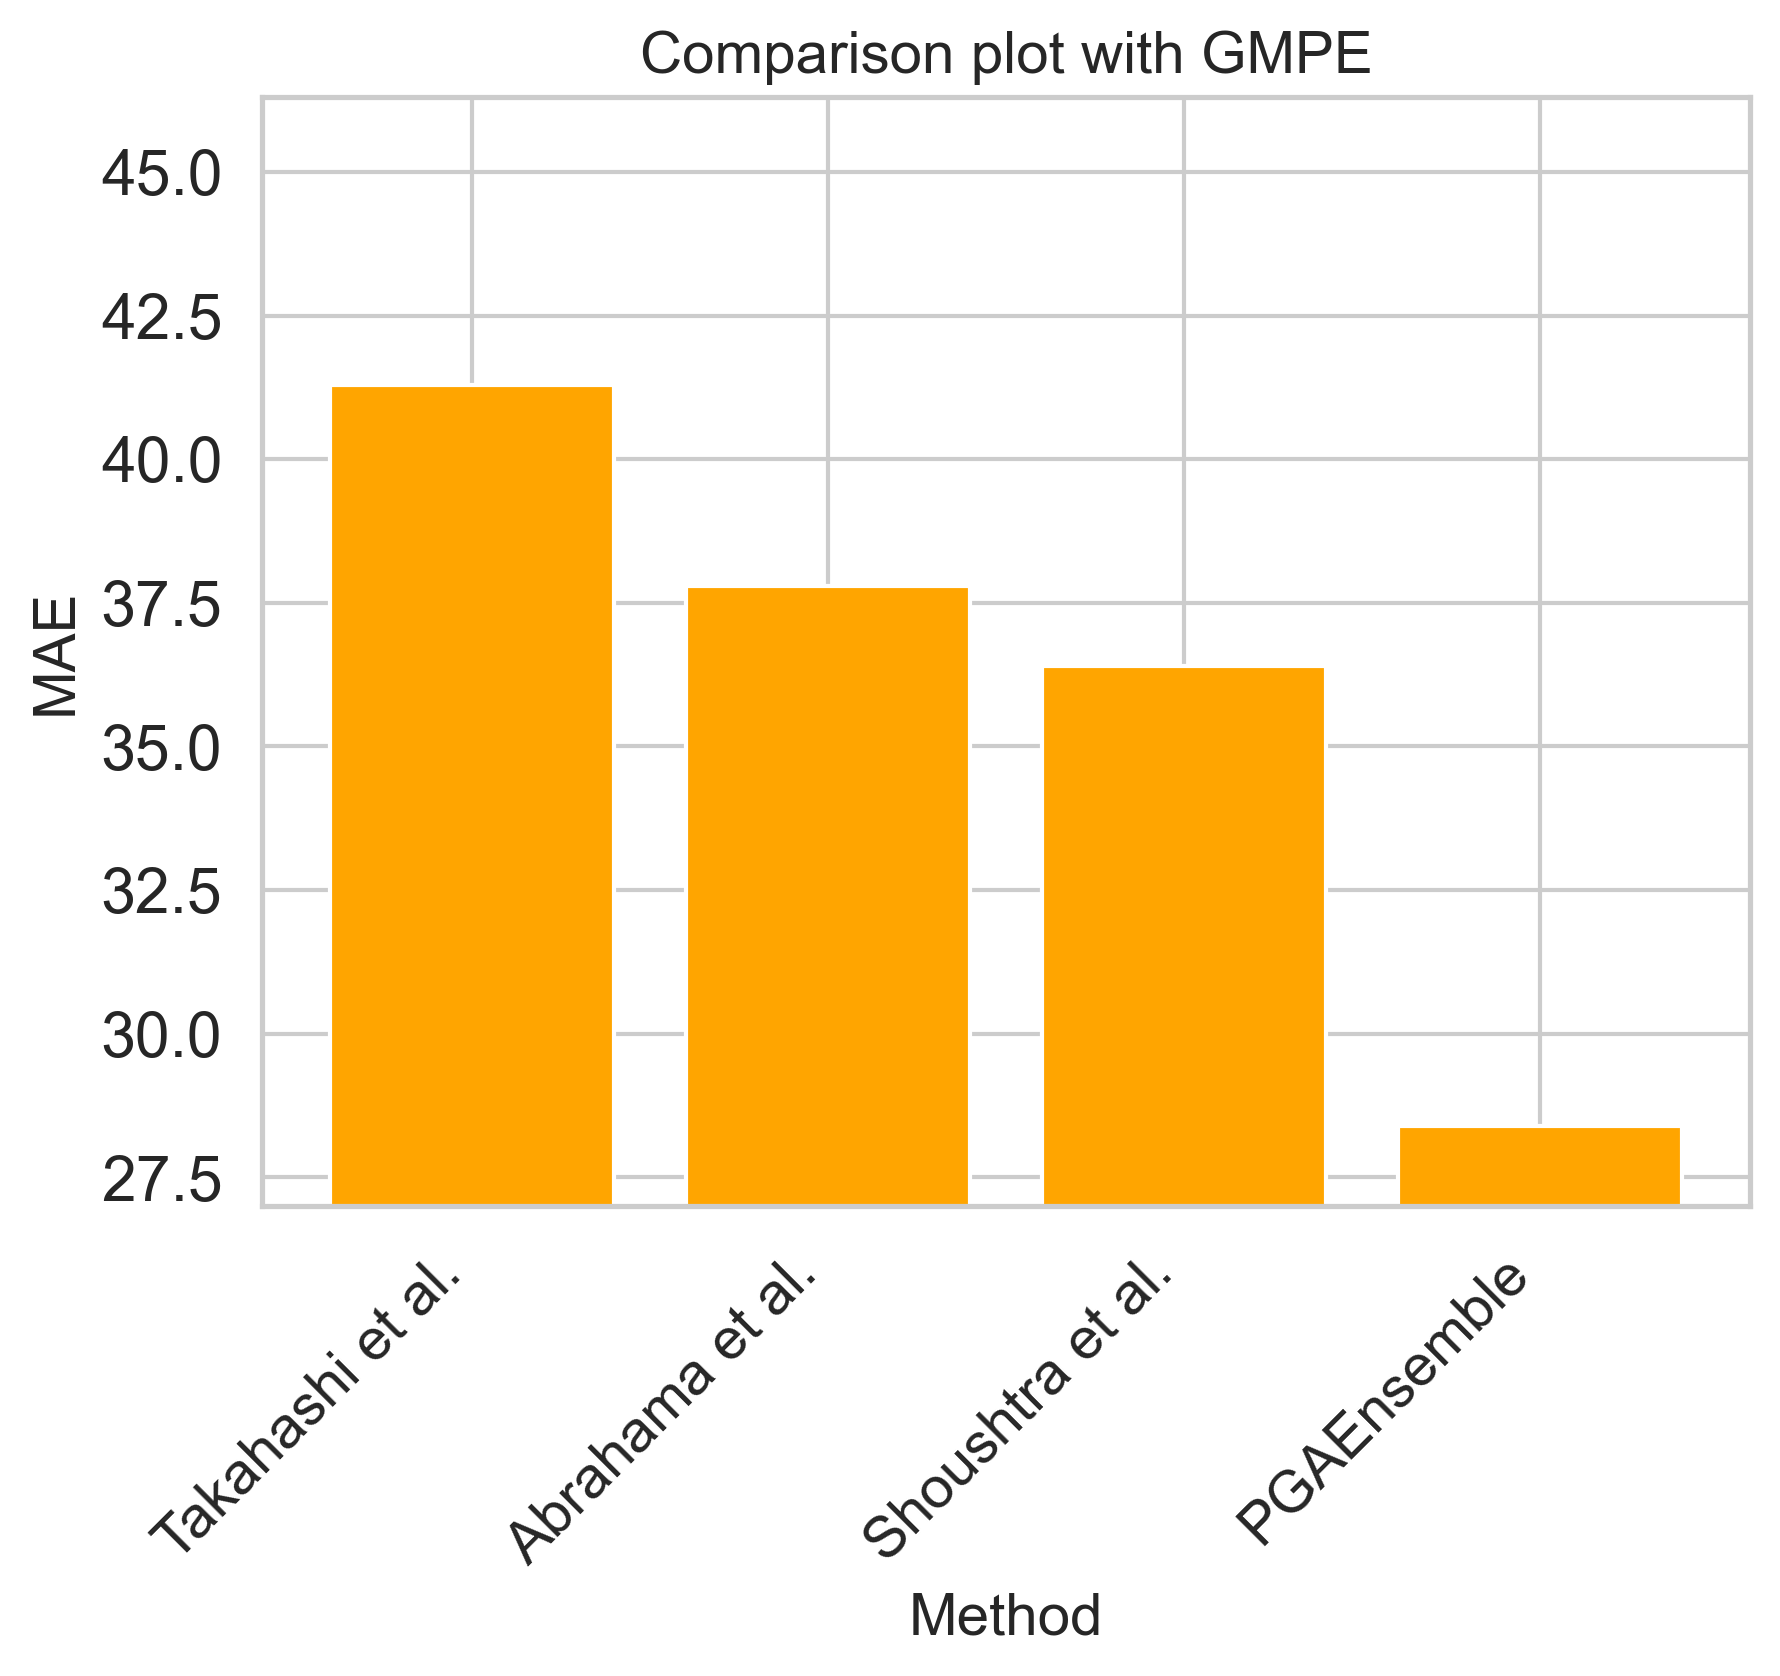

In [38]:
values = [41.3, 37.8, 36.4, 28.4]
names = ['Takahashi et al.', 'Abrahama et al.', 'Shoushtra et al.', 'PGAEnsemble']

# Set the starting limit
start_limit = 27

# Set the DPI for the plot
plt.figure(dpi=300)

# Create a bar plot
plt.bar(range(len(values)), values, color='orange')

# Set the x-axis ticks and labels
plt.xticks(range(len(values)), names, rotation=45, ha='right',fontsize=14)

# Set the y-axis lower limit to start_limit
plt.ylim(start_limit, max(values) + 5)
plt.yticks(fontsize=15)
# Add labels and title
plt.xlabel('Method',fontsize=14)
plt.ylabel('MAE',fontsize=14)
plt.title('Comparison plot with GMPE',fontsize=14)

# Show the plot
plt.show()